# Chapter 4.2 Classifying Newswires Multiclass Classification 

In this section, we’ll build a model to classify Reuters newswires into 46 mutually
exclusive topics. 

Because we have many classes, this problem is an instance of multiclass classification, and because each data point should be classified into only one category, the problem is more specifically an instance of single-label multiclass classification.

If each data point could belong to multiple categories (in this case, topics), we’d be
facing a multilabel multiclass classification problem.

### 4.2.1 The Reuters DataSet

You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

Listing 4.11 Loading the Reuters Dataset

In [76]:
from tensorflow import keras
from keras.datasets import reuters 

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words= 10000)

In [77]:
print(len(train_data))
print(len(test_data))

8982
2246


In [78]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


Listing 4.12 Decoding newswires back to text

In [79]:
word_index = reuters.get_word_index()
revers_word_index = dict( (value,key) for (key,value) in word_index.items()  )

decoded_newswire = "".join( [revers_word_index.get(i-3,"?") for i in train_data[0]  ]           )
print(decoded_newswire)

???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3


In [80]:
import numpy as np
def vectorize_sequence(sequences,num_dim = 10000):
    results  = np.zeros((len(sequences),num_dim))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

List 4.13 Encoding the input data

In [81]:
x_train = vectorize_sequence(train_data).astype("float32")
x_test = vectorize_sequence(test_data).astype("float32")

List 4.14 Encoding the labels

In [82]:
def to_one_hot (labels,dimension = 46):
    results = np.zeros((len(labels),dimension))
    for i , label in enumerate(labels):
        results[i,label] = 1
    return results


y_train  = to_one_hot(train_labels).astype("float32")
y_test  = to_one_hot(test_labels).astype("float32")


There is a built-in method

In [83]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


### 4.2.3 Builing your model

In a stack of Dense layers like those we’ve been using, each layer can only access
information present in the output of the previous layer. 

If one layer drops some information relevant to the classification problem, this information can never be
recovered by later layers: each layer can potentially become an information bottleneck.

In the previous example, we used 16-dimensional intermediate layers, but a
16-dimensional space may be too limited to learn to separate 46 different classes:
such small layers may act as information bottlenecks, permanently dropping relevant information.

Listing 4.15 Model definition

In [84]:
from tensorflow import keras
from keras import layers



model = keras.Sequential([
                        layers.Dense(units=64, activation='relu'),
                        layers.Dense(units=64, activation='relu'),
                        layers.Dense(units=46, activation='softmax'),
                        
])

+ First, we end the model with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector
(each dimension) will encode a different output class.


+ Second, the last layer uses a softmax activation. It means the model will output a probability distribution over the 46 different output classes—for every input sample, the model will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions.

 By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.

Listing 4.16 Compiling the model

In [85]:
model.compile(
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            loss = keras.losses.CategoricalCrossentropy(),
            metrics = [keras.metrics.Accuracy()]

                )

### 4.2.4 Validating your approach

Listing 4.17 Setting aside validation set 

In [86]:
x_val = x_train[:1000]
y_val = y_train[:1000]

pratial_x_train = x_train[1000:]
pratial_y_train = y_train[1000:]

List 4.18 Training the model 

In [87]:
history = model.fit(
        pratial_x_train,
        pratial_y_train,
        epochs = 40,
        batch_size = 512,
        validation_data = (x_val,y_val)
)

Epoch 1/40
16/16 [==============================] - 1s 24ms/step - loss: 2.5563 - accuracy: 0.0000e+00 - val_loss: 1.6427 - val_accuracy: 0.0000e+00
Epoch 2/40
16/16 [==============================] - 0s 20ms/step - loss: 1.3761 - accuracy: 0.0000e+00 - val_loss: 1.2719 - val_accuracy: 0.0000e+00
Epoch 3/40
16/16 [==============================] - 0s 18ms/step - loss: 1.0401 - accuracy: 0.0000e+00 - val_loss: 1.1229 - val_accuracy: 0.0000e+00
Epoch 4/40
16/16 [==============================] - 0s 17ms/step - loss: 0.8228 - accuracy: 0.0000e+00 - val_loss: 1.0261 - val_accuracy: 0.0000e+00
Epoch 5/40
16/16 [==============================] - 0s 18ms/step - loss: 0.6602 - accuracy: 0.0000e+00 - val_loss: 0.9639 - val_accuracy: 0.0000e+00
Epoch 6/40
16/16 [==============================] - 0s 16ms/step - loss: 0.5263 - accuracy: 0.0000e+00 - val_loss: 0.9104 - val_accuracy: 0.0000e+00
Epoch 7/40
16/16 [==============================] - 0s 17ms/step - loss: 0.4226 - accuracy: 2.7235e-06 - v

In [88]:
history_dict = history.history

loss = history_dict['loss']
accuracy = history_dict['accuracy']

val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']

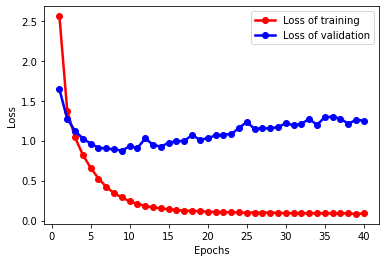

In [92]:
from matplotlib import pyplot as plt

epoch = np.arange(1,len(loss)+1)

plt.plot(epoch,loss,'o-r',lw = 2.5,label = 'Loss of training')
plt.plot(epoch,val_loss,'o-b',lw = 2.5,label = 'Loss of validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

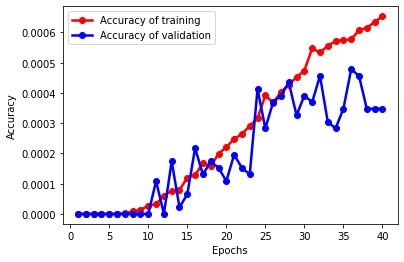

In [93]:
from matplotlib import pyplot as plt

epoch = np.arange(1,len(loss)+1)
plt.clf()
plt.plot(epoch,accuracy,'o-r',lw = 2.5,label = 'Accuracy of training')
plt.plot(epoch,val_accuracy,'o-b',lw = 2.5,label = 'Accuracy of validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()